In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings


warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('data/stud.csv')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

# Data Chekc to perfom




- Find Missing Values
- Check Duplicates
- Check Datatype
- Check the number of unique values from each column
- Check statistics of dataset
- Check various categories present

In [6]:
#check missing values
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [7]:
#check dupliacte values
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Exploring data

In [11]:
print('categories in gender variable:', end=" ")
print(df['gender'].unique())

print('categories in race/ethinicity variable:', end=" ")
print(df['race_ethnicity'].unique())

print('categories in lunch variable:', end=" ")
print(df['lunch'].unique())


print('categories in test_prep_course variable:', end=" ")
print(df['test_preparation_course'].unique())


categories in gender variable: ['female' 'male']
categories in race/ethinicity variable: ['group B' 'group C' 'group A' 'group D' 'group E']
categories in lunch variable: ['standard' 'free/reduced']
categories in test_prep_course variable: ['none' 'completed']


In [12]:
#define numerical and categorical columns

numerical_column=[feature for feature in df.columns if df[feature].dtype!='O']


categorical_column=[feature for feature in df.columns if df[feature].dtype=='O']

In [13]:
print(numerical_column)
print(categorical_column)

['math_score', 'reading_score', 'writing_score']
['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [14]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#Add column for total score

In [15]:
df['total_score']=df['math_score']+df['reading_score']+df['writing_score']
df['average']=df['total_score']/3

In [16]:
reading_full=df[df['reading_score']==100]['average'].count()
writing_full=df[df['writing_score']==100]['average'].count()
math_full=df[df['math_score']==100]['average'].count()

print(f'number of student with full marks in maths:{math_full}')
print(f'number of student with full marks in writing:{writing_full}')
print(f'number of student with full marks in reading:{reading_full}')

number of student with full marks in maths:7
number of student with full marks in writing:14
number of student with full marks in reading:17


In [17]:
reading_less=df[df['reading_score']<=20]['average'].count()
writing_less=df[df['writing_score']<=20]['average'].count()
math_less=df[df['math_score']<=20]['average'].count()

In [18]:
print(f'number of student with less marks in maths:{math_less}')
print(f'number of student with less marks in writing:{writing_less}')
print(f'number of student with less marks in reading:{reading_less}')

number of student with less marks in maths:4
number of student with less marks in writing:3
number of student with less marks in reading:1


### Visualization of data


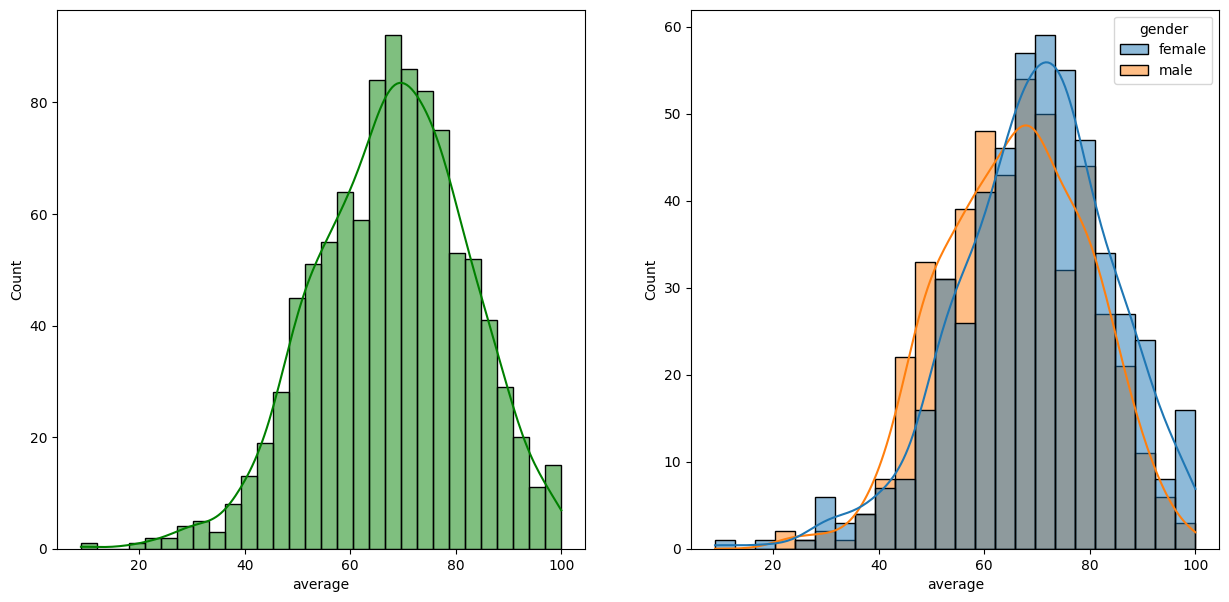

In [19]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

### Insights

Female students perform better than male students

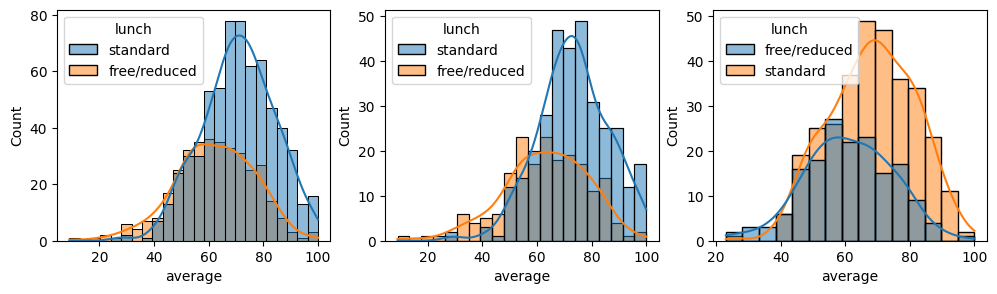

In [20]:
plt.subplots(1,3,figsize=(12,3))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

### Insights

Standard lunch helps perform well in exams be it a male or a female.

<Axes: xlabel='average', ylabel='Count'>

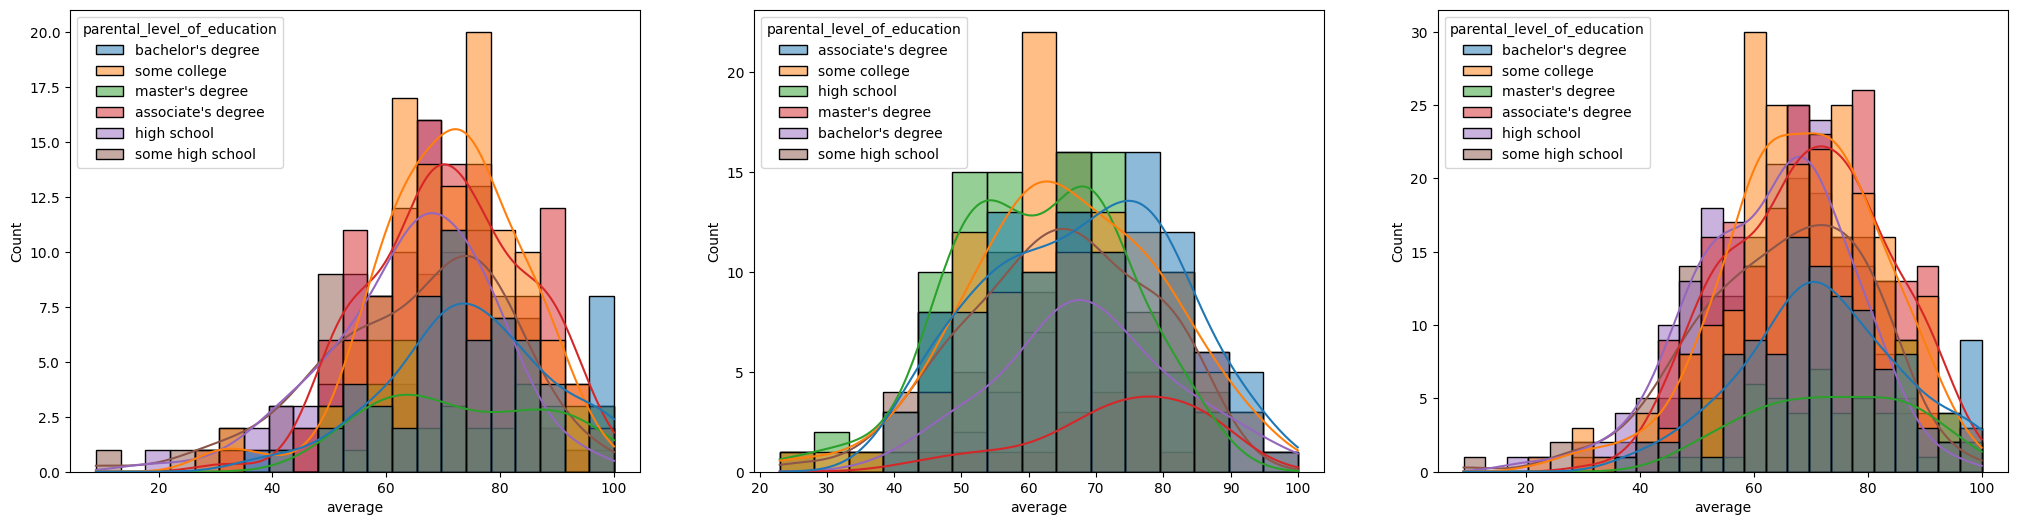

In [21]:
plt.subplots(1,3,figsize=(25,6))
sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(131)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(132)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(133)


### Insights
In general parent's education don't help student perform well in exam.
2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
3rd plot we can see there is no effect of parent's education on female students.


#### Multivariate analysis using pieplot


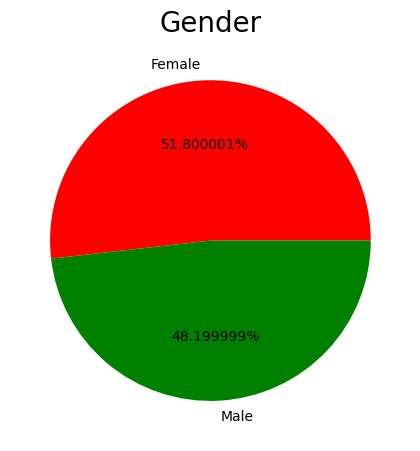

In [22]:
plt.rcParams['figure.figsize']=(30,12)

plt.subplot(1,5,1)
size=df['gender'].value_counts()
labels='Female','Male'
color=['red','green']

plt.pie(size,colors=color,labels=labels,autopct='%2f%%')
plt.title('Gender',fontsize=20)
plt.axis('off')
plt.show()

In [23]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
